In [1]:
## Contents

## 1. Checks and Preparation
## 2. PII 
## 3. Regions
## 4. Flags for Low activity
## 5. Customer Profile
## 6. Max, Mean and Min
## 7. Visualization
## 8. Exporting Visualization

In [2]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\Saskia\Desktop\new'

In [4]:
full_data = pd.read_pickle(r'C:\Users\Saskia\Desktop\new\02 Data\Prepared Data\Full_data.pkl')

In [5]:
# Checking Dataframe

full_data.shape

(16153014, 36)

In [6]:
full_data.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,...,first_name,Surnam,gender,state,age,date_joined,#_dependants,marital_status,income,#_depndants
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,65,9,prior,16,...,Nicole,Conrad,Male,District of Columbia,79,1/16/2020,3,married,154743,3
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,-103,9,prior,2,...,Nicole,Conrad,Male,District of Columbia,79,1/16/2020,3,married,154743,3
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,113,9,prior,4,...,Nicole,Conrad,Male,District of Columbia,79,1/16/2020,3,married,154743,3
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,-67,9,prior,6,...,Nicole,Conrad,Male,District of Columbia,79,1/16/2020,3,married,154743,3
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,-12,9,prior,7,...,Nicole,Conrad,Male,District of Columbia,79,1/16/2020,3,married,154743,3


In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16153014 entries, 0 to 16153013
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0              int32   
 1   product_id              int32   
 2   product_name            object  
 3   aisle_id                int32   
 4   department_id           int32   
 5   prices                  float64 
 6   order_id                int8    
 7   user_id                 object  
 8   eval_set                object  
 9   order_number            int8    
 10  orders_day_of_week      int8    
 11  order_time_of_day       int8    
 12  days_since_prior_order  float64 
 13  add_to_cart_order       int32   
 14  reordered               int32   
 15  _merge                  category
 16  busiest_day             object  
 17  busiest days            object  
 18  busiest_days            object  
 19  busiest_period_of_day   object  
 20  max_order               int8    
 21  loyalt

In [8]:
full_data['product_id'] = full_data['product_id'].astype('int8')

In [9]:
full_data['aisle_id'] = full_data['aisle_id'].astype('int8')

In [10]:
full_data['add_to_cart_order'] = full_data['add_to_cart_order'].astype('int8')

In [11]:
full_data['reordered'] = full_data['reordered'].astype('int8')

In [12]:
full_data['#_dependants'] = full_data['#_dependants'].astype('int32')

In [13]:
full_data['income'] = full_data['income'].astype('int8')

In [14]:
df_dep = pd.read_csv(os.path.join(r'C:\Users\Saskia\Desktop\new\02 Data\Original Data\departments.csv'), index_col=False)

In [15]:
df_dep.shape

(1, 22)

In [16]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  1 non-null      object
 1   1              1 non-null      object
 2   2              1 non-null      object
 3   3              1 non-null      object
 4   4              1 non-null      object
 5   5              1 non-null      object
 6   6              1 non-null      object
 7   7              1 non-null      object
 8   8              1 non-null      object
 9   9              1 non-null      object
 10  10             1 non-null      object
 11  11             1 non-null      object
 12  12             1 non-null      object
 13  13             1 non-null      object
 14  14             1 non-null      object
 15  15             1 non-null      object
 16  16             1 non-null      object
 17  17             1 non-null      object
 18  18             1 non-null      obj

In [17]:
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [18]:
df_dep.columns

Index(['department_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype='object')

In [19]:
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [20]:
df_dep_t = df_dep.T

In [21]:
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [22]:
new_header = df_dep_t.iloc[0]

In [23]:
new_header

0    department
Name: department_id, dtype: object

In [24]:
df_dep_t_new = df_dep_t[1:]

In [25]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [26]:
df_dep_t_new.columns = new_header

In [27]:
df_dep_t_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [28]:
df_dep_t_new.head()

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [29]:
df_dep_t_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 21
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   department  21 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


In [30]:
## Delete columns for memory saving

In [31]:
full_data=full_data.drop(columns=['_merge', 'aisle_id'])

In [32]:
## Renaming a column

In [33]:
df_dep_t_new.rename(columns={'unnamed: 0':'department_id'}, inplace=True)

C:\Users\Saskia\AppData\Local\Temp\ipykernel_12008\286221367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_t_new.rename(columns={'unnamed: 0':'department_id'}, inplace=True)


In [34]:
full_data['department_id'] = full_data['department_id'].astype('str')

In [35]:
data_merged=full_data.merge(df_dep, on='department_id')

In [36]:
# Creating a list of Regions

In [37]:
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [38]:
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [39]:
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [40]:
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [41]:
## Regional Flags

In [44]:
full_data.loc[full_data['state'].isin(Northeast), 'region'] = 'Northeast'

In [45]:
full_data.loc[full_data['state'].isin(Midwest), 'region'] = 'Midwest'

In [46]:
full_data.loc[full_data['state'].isin(South), 'region'] = 'South'

In [47]:
full_data.loc[full_data['state'].isin(West), 'region'] = 'West'

In [48]:
full_data['region'].value_counts(dropna=False)

South        5352241
West         4331720
Midwest      3627924
Northeast    2841129
Name: region, dtype: int64

In [50]:
crosstab=pd.crosstab(full_data['region'], full_data['spending_flag'], dropna=False)

In [51]:
crosstab

spending_flag,high spender,low spender
region,,
Midwest,2109578,1518346
Northeast,1166316,1674813
South,3577895,1774346
West,2780717,1551003


In [52]:
## number of states per region

In [53]:
full_data.groupby('region')['state'].nunique()

region
Midwest      12
Northeast     9
South        17
West         13
Name: state, dtype: int64

In [54]:
## There are more in the South having a correlation with High spenders and Low spenders.

In [55]:
## ## Ordering habits

In [56]:
full_data.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    11.939114  1.0  99999.0
Northeast  11.121539  1.0  99999.0
South      11.927669  1.0  99999.0
West       12.143713  1.0  99999.0

In [57]:
## The South has most customers , followed by the West, Midwest and Northeast.

In [58]:
## Flag for low activity customers

In [59]:
## average price per customer

In [61]:
full_data.groupby('region').agg({'product_id': ['mean', 'min', 'max']})

product_id          
                mean  min  max
region                        
Midwest     1.596019 -128  127
Northeast   1.604999 -128  127
South       1.406568 -128  127
West        1.459437 -128  127

In [62]:
## Using crosstab to view customer loyalty 

In [64]:
cross_customer=pd.crosstab(full_data['region'], full_data['loyalty_flag'], dropna=False)

In [65]:
## Exclusion Flag

In [66]:
full_data.loc[full_data['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [69]:
full_data.loc[full_data['max_order'] > 5, 'exclusion_flag'] = 'Normal activity customer'

In [70]:
full_data['exclusion_flag'].value_counts(dropna=False)

Normal activity customer    16153014
Name: exclusion_flag, dtype: int64

In [71]:
full_data_activity = full_data[full_data['exclusion_flag']=='Low activity customer']

In [72]:
full_data_activity.shape

(0, 36)

In [73]:
full_data_activity_1 = full_data[full_data['exclusion_flag']=='Normal activity customer']

In [74]:
full_data_activity_1.shape

(16153014, 36)

In [75]:
full_data_activity_1.exclusion_flag.value_counts()

Normal activity customer    16153014
Name: exclusion_flag, dtype: int64

In [76]:
## checking for missing values

In [77]:
full_data_activity_1['exclusion_flag'].value_counts(dropna=False)

Normal activity customer    16153014
Name: exclusion_flag, dtype: int64

In [78]:
## Customer Profiles

In [79]:
## Customers into Age Group
# Range 1 = Young Adult
# Range 2 = Adult
# Range 3 = Senior

In [81]:
full_data_activity_1.loc[(full_data_activity_1['age'] >= 18) & (full_data_activity_1['age'] <= 35), 'age_range']= '1'

In [82]:
full_data_activity_1.loc[(full_data_activity_1['age'] > 35) & (full_data_activity_1['age'] <= 64), 'age_range']= '2'

In [83]:
full_data_activity_1.loc[(full_data_activity_1['age'] > 64), 'age_range']= '3'

In [85]:
full_data_activity_1['age_range'].value_counts()

2    7435354
3    4633859
1    4083801
Name: age_range, dtype: int64

In [86]:
## The most age of customers is between ages of 35 - 64

In [87]:
# Time of day

In [88]:
# 12:00 am - 05:59 am = early morning
# 06:00 am - 11:59 am = morning
# 12:00 pm - 04:59 pm = afternoon
# 05:00 pm - 07:59 pm = evening
# 08:00 pm - 11:59 pm = night

In [89]:
full_data_orders = full_data.drop_duplicates(subset='order_id').copy()

In [90]:
full_data_orders.shape

(256, 36)

In [94]:
full_data_orders.loc[(full_data_orders['order_time_of_day'] > 0) & (full_data_orders['order_time_of_day'] < 6), 'time_of_day']= 'early morning'

In [95]:
full_data_orders.loc[(full_data_orders['order_time_of_day'] >= 6) & (full_data_orders['order_time_of_day'] < 12), 'time_of_day']= 'morning'

In [96]:
full_data_orders.loc[(full_data_orders['order_time_of_day'] >=12) & (full_data_orders['order_time_of_day'] < 17), 'time_of_day']= 'afternoon'

In [97]:
full_data_orders.loc[(full_data_orders['order_time_of_day'] >=17) & (full_data_orders['order_time_of_day'] < 20), 'time_of_day']= 'evening'

In [98]:
full_data_orders.loc[(full_data_orders['order_time_of_day'] >=20) & (full_data_orders['order_time_of_day'] < 24), 'time_of_day']= 'night'

In [99]:
full_data_orders['time_of_day'].value_counts()

afternoon        102
morning           87
evening           31
night             28
early morning      6
Name: time_of_day, dtype: int64

In [101]:
full_data_orders.head()

,Unnamed: 0,product_id,product_name,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,state,age,date_joined,#_dependants,marital_status,income,#_depndants,region,exclusion_flag,time_of_day
0,0,1,Chocolate Sandwich Cookies,19,5.8,65,9,prior,16,1,...,District of Columbia,79,1/16/2020,3,married,119,3,South,Normal activity customer,morning
1,0,1,Chocolate Sandwich Cookies,19,5.8,-103,9,prior,2,1,...,District of Columbia,79,1/16/2020,3,married,119,3,South,Normal activity customer,afternoon
2,0,1,Chocolate Sandwich Cookies,19,5.8,113,9,prior,4,4,...,District of Columbia,79,1/16/2020,3,married,119,3,South,Normal activity customer,morning
3,0,1,Chocolate Sandwich Cookies,19,5.8,-67,9,prior,6,1,...,District of Columbia,79,1/16/2020,3,married,119,3,South,Normal activity customer,afternoon
4,0,1,Chocolate Sandwich Cookies,19,5.8,-12,9,prior,7,4,...,District of Columbia,79,1/16/2020,3,married,119,3,South,Normal activity customer,afternoon


In [102]:
## Visualization

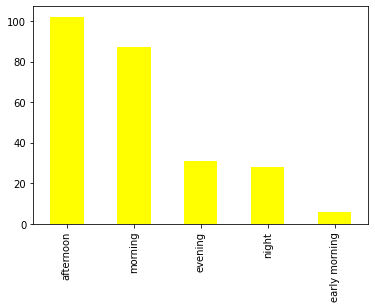

In [108]:
bar=full_data_orders['time_of_day'].value_counts().plot.bar(color='yellow')

In [109]:
## Between 12:00 pm to 05:00 pm has a higher demand in orders whilst early mornings, the hours between 12:00 am to 06:00 am has a low side in ordering.

In [111]:
full_data.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'busiest_day', 'busiest days', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_flag', 'purchase_frequency',
       'frequency_flag', 'first_name', 'Surnam', 'gender', 'state', 'age',
       'date_joined', '#_dependants', 'marital_status', 'income',
       '#_depndants', 'region', 'exclusion_flag'],
      dtype='object')

In [112]:
## Values in department column

In [119]:
print(full_data['department_id'].unique())

['19' '1' '16' '7' '12' '11' '14' '15' '4' '6' '20' '13' '18' '3' '17' '9'
 '5' '8' '21' '10' '2']


In [120]:
df_dep_t_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [125]:
print(df_dep_t_new['department'].unique())

['frozen' 'other' 'bakery' 'produce' 'alcohol' 'international' 'beverages'
 'pets' 'dry goods pasta' 'bulk' 'personal care' 'meat seafood' 'pantry'
 'breakfast' 'canned goods' 'dairy eggs' 'household' 'babies' 'snacks'
 'deli' 'missing']


In [126]:
## Products from Pet department

In [129]:
df_dep_t_new['pet_stuff'] = [1 if x == 'pets' else 0 for x in df_dep_t_new['department']]

C:\Users\Saskia\AppData\Local\Temp\ipykernel_12008\2307259399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_t_new['pet_stuff'] = [1 if x == 'pets' else 0 for x in df_dep_t_new['department']]


In [137]:
df_dep_t_new['pet_stuff'] = df_dep_t_new.groupby(['department'])['pet_stuff'].transform('max')

C:\Users\Saskia\AppData\Local\Temp\ipykernel_12008\4067645080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_t_new['pet_stuff'] = df_dep_t_new.groupby(['department'])['pet_stuff'].transform('max')


In [138]:
df_dep_t_new['pet_stuff'] = df_dep_t_new['pet_stuff'].astype('int8')

C:\Users\Saskia\AppData\Local\Temp\ipykernel_12008\4070420271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_t_new['pet_stuff'] = df_dep_t_new['pet_stuff'].astype('int8')


In [140]:
## Groupping (Income)
# Below 52,200 = Low Income
# Between 52,200 & 156,600 = Middle Income
# Above 156,600 = High Income

In [144]:
full_data.loc[full_data['income']<52200, 'income_flag'] = 'Low Income'

In [145]:
full_data.loc[(full_data['income']>=52200) & (full_data['income']<=156600), 'income_flag'] = 'Middle Income'

In [146]:
full_data.loc[full_data['income']>156600, 'income_flag'] = 'High Income'

In [147]:
full_data['income_flag'].value_counts(dropna=False)

Low Income    16153014
Name: income_flag, dtype: int64

In [148]:
full_data_income = full_data.drop_duplicates(subset='income').copy()

In [170]:
full_data_income.loc[full_data_income['income']<52200, 'income_flag'] = 'Low Income'

In [171]:
full_data_income.loc[(full_data_income['income']>=52200) & (full_data_income['income']<=156600), 'income_flag'] = 'Middle Income'

In [172]:
full_data_income.loc[full_data_income['income']>156600, 'income_flag'] = 'High Income'

In [173]:
full_data['income_flag'].value_counts(dropna=False)

Low Income    16153014
Name: income_flag, dtype: int64

In [174]:
full_data.head()

,Unnamed: 0,product_id,product_name,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,state,age,date_joined,#_dependants,marital_status,income,#_depndants,region,exclusion_flag,income_flag
0,0,1,Chocolate Sandwich Cookies,19,5.8,65,9,prior,16,1,...,District of Columbia,79,1/16/2020,3,married,119,3,South,Normal activity customer,Low Income
1,0,1,Chocolate Sandwich Cookies,19,5.8,-103,9,prior,2,1,...,District of Columbia,79,1/16/2020,3,married,119,3,South,Normal activity customer,Low Income
2,0,1,Chocolate Sandwich Cookies,19,5.8,113,9,prior,4,4,...,District of Columbia,79,1/16/2020,3,married,119,3,South,Normal activity customer,Low Income
3,0,1,Chocolate Sandwich Cookies,19,5.8,-67,9,prior,6,1,...,District of Columbia,79,1/16/2020,3,married,119,3,South,Normal activity customer,Low Income
4,0,1,Chocolate Sandwich Cookies,19,5.8,-12,9,prior,7,4,...,District of Columbia,79,1/16/2020,3,married,119,3,South,Normal activity customer,Low Income


In [175]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16153014 entries, 0 to 16153013
Data columns (total 37 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int32  
 1   product_id              int8   
 2   product_name            object 
 3   department_id           object 
 4   prices                  float64
 5   order_id                int8   
 6   user_id                 object 
 7   eval_set                object 
 8   order_number            int8   
 9   orders_day_of_week      int8   
 10  order_time_of_day       int8   
 11  days_since_prior_order  float64
 12  add_to_cart_order       int8   
 13  reordered               int8   
 14  busiest_day             object 
 15  busiest days            object 
 16  busiest_days            object 
 17  busiest_period_of_day   object 
 18  max_order               int8   
 19  loyalty_flag            object 
 20  average_spending        float64
 21  spending_flag           objec

In [179]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_time_of_day'))

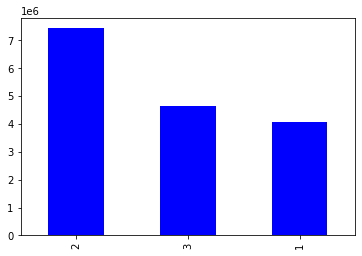

In [180]:
bar=full_data_activity_1['age_range'].value_counts().plot.bar(color='blue')

In [181]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_age_range'))

In [182]:
## Exporting final work as a pickle file

In [183]:
full_data.to_pickle(os.path.join(path, '02 Data','Prepared Data','4,10.1pkl'))